# Baseline Logistic Model

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from preprocessing import X_train_proc, X_val_proc, X_test_proc, y_train, y_val, y_test, feature_names
import matplotlib.pyplot as plt

RANDOM_STATE = 42


In [4]:

model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
model.fit(X_train_proc, y_train)

print("Model training completed")
print(f"Number of features: {len(feature_names)}")
print(f"Classes: {model.classes_}")

Model training completed
Number of features: 63
Classes: ['NO' 'YES']


In [5]:
y_train_pred = model.predict(X_train_proc)
y_val_pred = model.predict(X_val_proc)
y_test_pred = model.predict(X_test_proc)

y_train_proba = model.predict_proba(X_train_proc)[:, 1]
y_val_proba = model.predict_proba(X_val_proc)[:, 1]
y_test_proba = model.predict_proba(X_test_proc)[:, 1]

print("=== Model Performance ===\n")
print("TRAIN SET:")
print(f"  Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"  ROC-AUC:  {roc_auc_score(y_train, y_train_proba):.4f}")
print(f"  F1-Score: {f1_score(y_train, y_train_pred, pos_label='YES'):.4f}\n")

print("VALIDATION SET:")
print(f"  Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"  ROC-AUC:  {roc_auc_score(y_val, y_val_proba):.4f}")
print(f"  F1-Score: {f1_score(y_val, y_val_pred, pos_label='YES'):.4f}\n")

print("TEST SET:")
print(f"  Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  ROC-AUC:  {roc_auc_score(y_test, y_test_proba):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_test_pred, pos_label='YES'):.4f}")


=== Model Performance ===

TRAIN SET:
  Accuracy: 0.8778
  ROC-AUC:  0.8037
  F1-Score: 0.2146

VALIDATION SET:
  Accuracy: 0.8790
  ROC-AUC:  0.8073
  F1-Score: 0.2151

TEST SET:
  Accuracy: 0.8763
  ROC-AUC:  0.8079
  F1-Score: 0.2016


In [6]:
print("\n=== Classification Report (Test Set) ===\n")
print(classification_report(y_test, y_test_pred))


=== Classification Report (Test Set) ===

              precision    recall  f1-score   support

          NO       0.88      0.99      0.93      9150
         YES       0.59      0.12      0.20      1350

    accuracy                           0.88     10500
   macro avg       0.74      0.55      0.57     10500
weighted avg       0.85      0.88      0.84     10500



In [7]:
print("\n=== Confusion Matrix (Test Set) ===\n")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives:  {cm[1, 1]}")


=== Confusion Matrix (Test Set) ===

[[9037  113]
 [1186  164]]

True Negatives:  9037
False Positives: 113
False Negatives: 1186
True Positives:  164


In [8]:
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

feature_importance

,feature,coefficient
46,ohe__boost_Extra_Cancellation_1,-1.072021
45,ohe__boost_Extra_Cancellation_0,0.967228
13,ohe__platform_app,0.828305
51,ohe__boost_Existing_Medical_Conditions_0,-0.746062
0,num__quote_price,-0.706082
...,...,...
28,ohe__isEurope_1,-0.015360
30,ohe__isNorthAmerica_1,0.015010
16,ohe__quoteCreateDay_Friday,0.012719
57,ohe__boost_Rental_Vehicle_Insurance_Excess_0,0.009061


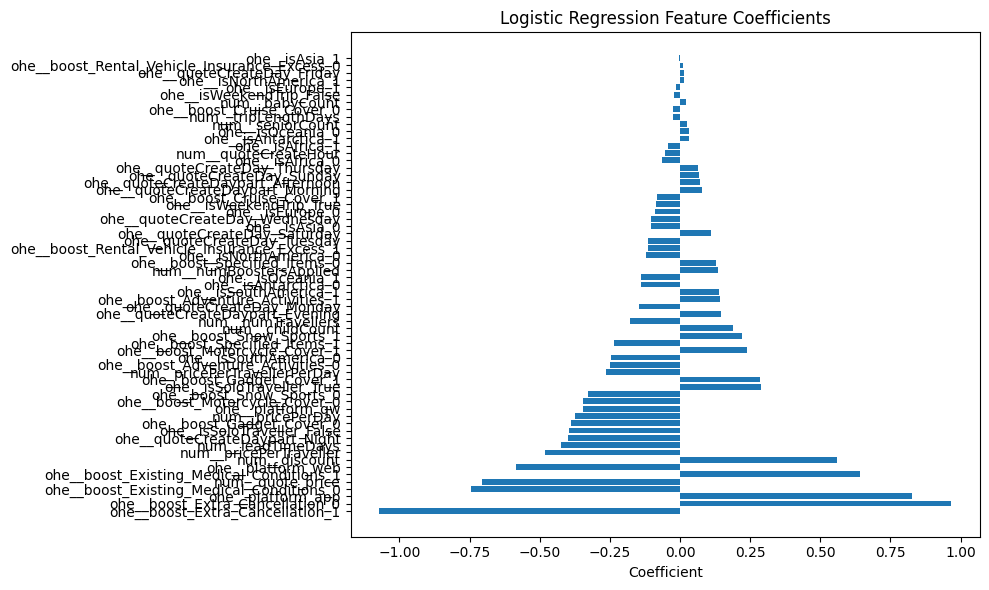

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['coefficient'])
plt.xlabel('Coefficient')
plt.title('Logistic Regression Feature Coefficients')
plt.tight_layout()
plt.show()

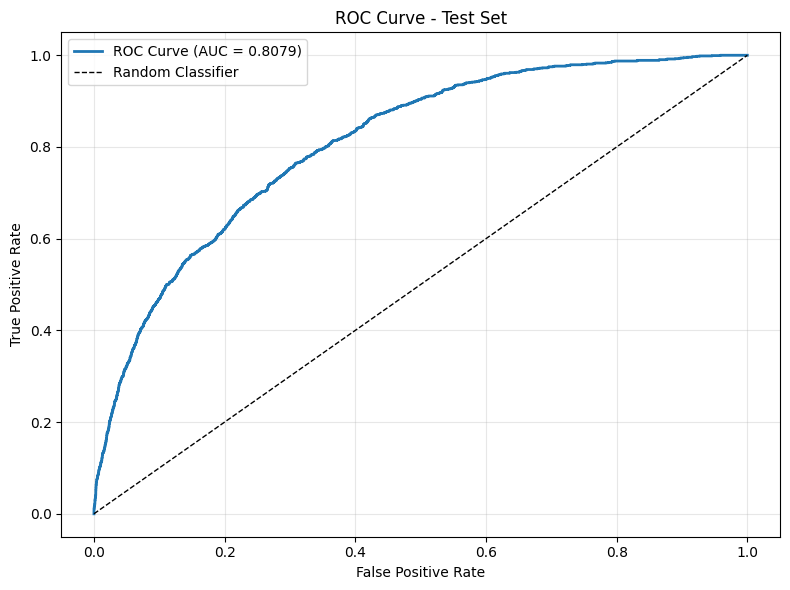

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba, pos_label='YES')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
